### Problem Statement
#### Exploratory Analysis of NYC Parking tickets.
Big data analytics allows you to analyse data at scale. It has applications in almost every industry in the world. Let’s consider an unconventional application that you wouldn’t ordinarily encounter.
 
New York City is a thriving metropolis. Just like most other metros its size, one of the biggest problems its citizens face is parking. The classic combination of a huge number of cars and cramped geography leads to a huge number of parking tickets.
 
In an attempt to scientifically analyse this phenomenon, the NYC Police Department has collected data for parking tickets. Of these, the data files for multiple years are publicly available on Kaggle. We will try and perform some exploratory analysis on a part of this data. Spark will allow us to analyse the full files at high speeds as opposed to taking a series of random samples that will approximate the population. For the scope of this analysis, we will analyse the parking tickets over the year 2017. 
 
Note: Although the broad goal of any analysis of this type is to have better parking and fewer tickets, we are not looking for recommendations on how to reduce the number of parking tickets—there are no specific points reserved for this.
 
The purpose of this case study is to conduct an exploratory data analysis that will help you understand the data. Since the size of the dataset is large, your queries will take some time to run, and you will need to identify the correct queries quicker. The questions given below will guide your analysis.


### Objectives of the Case Study

Primarily, this case study is meant as a deep dive into the usage of Spark. As you saw while working with Spark, its syntax behaves differently from a regular Python syntax. One of the major objectives of this case study is to gain familiarity with how analysis works in PySpark as opposed to base Python.
Learning the basic idea behind using functions in PySpark can help in using other libraries like SparkR. If you are in a company where R is a primary language, you can easily pick up SparkR syntax and use Spark’s processing power.
The process of running a model-building command boils down to a few lines of code. While drawing inferences from data, the most time-consuming step is preparing the data up to the point of model building. So, this case study will focus more on exploratory analysis.



In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("NYC Exploratory Analysis-BHS") \
    .getOrCreate()

In [2]:
#'/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv'
parking_bhs = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
parking_bhs

DataFrame[Summons Number: bigint, Plate ID: string, Registration State: string, Issue Date: timestamp, Violation Code: int, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: int, Issuer Precinct: int, Violation Time: string]

In [3]:
parking_bhs.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|         Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23 00:00:00|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|         

In [4]:
# summary statistics
parking_bhs.describe().show()

+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|      Summons Number|Plate ID|Registration State|    Violation Code| Vehicle Body Type|      Vehicle Make|Violation Precinct|  Issuer Precinct|   Violation Time|
+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|            10803028|10803028|          10803028|          10803028|          10803028|          10803028|          10803028|         10803028|         10803028|
|   mean|6.8174470290656595E9|Infinity|              99.0|34.599430455979565|3.9258887134586864| 6519.974025974026| 45.01216260848347|46.82931211508477|909.2857142857143|
| stddev| 2.320233962328229E9|     NaN|               0.0| 19.35986871632348|0.5013415469252523|18091.257389147086|40.552560268435805|62.66703577

In [5]:
# datatype of columns
parking_bhs.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: timestamp (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)



In [6]:
# Total row count
parking_bhs.count()

10803028

In [8]:
# Total column count
len(parking_bhs.columns)

10

In [9]:
# Let us drop the duplicates(If any) using dropDuplicates
parking_bhs=parking_bhs.dropDuplicates()
parking_bhs.count()

10803028

In [10]:
# Let us drop the null values(If any) using dropna()
parking_bhs=parking_bhs.dropna()
parking_bhs.count()

10803028

In [11]:
# Let us see the distinct Summons issued
parking_bhs.select('Summons Number').distinct().count()

10803028

###### Change the column names 
Replace '  ' with '_' 

In [12]:
parking_bhs= parking_bhs.toDF(*(c.replace(' ', '_') for c in parking_bhs.columns))
parking_bhs.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    4635295722| CXC9014|                NY|2017-06-15 00:00:00|            36|             SUBN|       NISSA|                 0|              0|         0100P|
|    5095923518| HKM4336|                NY|2017-04-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0100P|
|    5095901330| HKY8847|                NY|2017-04-06 00:00:00|             7|             SUBN|       DODGE|                 0|              0|         0100P|
|    5092838796| KBD3222|         

In [13]:
parking_bhs.createOrReplaceTempView("NYCparkingtableBHS")

In [14]:
spark.sql('Select * from NYCparkingtableBHS')

DataFrame[Summons_Number: bigint, Plate_ID: string, Registration_State: string, Issue_Date: timestamp, Violation_Code: int, Vehicle_Body_Type: string, Vehicle_Make: string, Violation_Precinct: int, Issuer_Precinct: int, Violation_Time: string]

In [15]:
# Total number of tickets for each year
tickets_per_year = spark.sql("select year(Issue_Date) as year, count(Summons_Number) as no_of_tickets from NYCparkingtableBHS group by year order by year")
tickets_per_year.show(100)

+----+-------------+
|year|no_of_tickets|
+----+-------------+
|1972|            2|
|1973|            2|
|1974|            1|
|1976|            1|
|1977|            1|
|1984|            1|
|1985|            1|
|1990|            2|
|1991|            3|
|1994|            1|
|1996|            1|
|1997|            1|
|2000|          185|
|2001|            2|
|2002|            1|
|2003|            1|
|2004|            2|
|2005|            1|
|2006|            8|
|2007|           18|
|2008|            4|
|2009|            3|
|2010|           48|
|2011|           22|
|2012|           87|
|2013|           70|
|2014|          120|
|2015|          419|
|2016|      5368391|
|2017|      5431918|
|2018|         1057|
|2019|          472|
|2020|           22|
|2021|           22|
|2022|            4|
|2023|            5|
|2024|            3|
|2025|            6|
|2026|           24|
|2027|           50|
|2028|            8|
|2029|            2|
|2030|           12|
|2031|            5|
|2033|       

In [16]:
tickets_per_year.count()

55

##### From the above two queries we can conclude the followig
     1) The data is available from 1972 to 2069
     2) The data is centered around 2016-2017
     3) There are 55 distinct years
Since the scope of the analysis is for the year 2017, we should consider data for that year only

In [17]:
# Create a new df with ONLY 2017 data
parking_bhs.createOrReplaceTempView("parking_bhs_2017")
parking_bhs=spark.sql("select * from parking_bhs_2017 where year(TO_DATE(CAST(UNIX_TIMESTAMP(Issue_Date,'MM/dd/yyyy') AS TIMESTAMP))) = 2017 ")
parking_bhs.count()

5431918

In [19]:
# For using SQL, you need to create a temporary view
parking_bhs.createOrReplaceTempView("parking_bhs_2017")

# Let us see the tickets issued month wise only in 2017. This will give us an idea of ticket frequency max, min, change of frequency over months

Tkt_Frequency_Monthwise_2017= spark.sql("SELECT year(Issue_Date) as year,month(Issue_Date) as month,count(*) as Ticket_Frequency FROM parking_bhs_2017 GROUP BY year(Issue_Date),month(Issue_Date) order by Ticket_Frequency desc")
Tkt_Frequency_Monthwise_2017.show()

+----+-----+----------------+
|year|month|Ticket_Frequency|
+----+-----+----------------+
|2017|    5|         1020244|
|2017|    3|          964737|
|2017|    4|          888402|
|2017|    1|          877365|
|2017|    6|          852187|
|2017|    2|          826967|
|2017|    7|             370|
|2017|    9|             367|
|2017|   12|             358|
|2017|   11|             338|
|2017|    8|             309|
|2017|   10|             274|
+----+-----+----------------+



###### From above we can conclude the following
    1) Maximum tickets issued in May.
    2) From Jul to Dec there is drop in the ticket frequency. It means the number of violations dropped from July to Dec.


In [20]:
# Lets draw a barchart between violations by month and ticket frequency
Violations_by_month = Tkt_Frequency_Monthwise_2017.toPandas()

<Figure size 432x288 with 0 Axes>

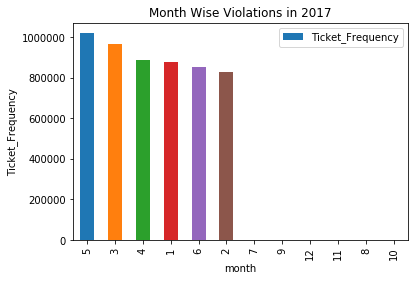

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
Violations_by_month.plot(x= 'month', y='Ticket_Frequency', kind='bar')
plt.title("Month Wise Violations in 2017")
plt.xlabel('month')
plt.ylabel('Ticket_Frequency')
plt.show()

##### Check for NULL values

In [23]:
null_values=spark.sql("Select count(*) as Number_of_Null_Values from parking_bhs_2017 where Summons_Number is NULL or Plate_ID is NULL or Registration_State is NULL or Issue_Date is NULL or Violation_Code is NULL or Vehicle_Body_Type is NULL or Vehicle_Make is NULL or Violation_Precinct is NULL or Issuer_Precinct is NUll or Violation_Time is NULL ")
null_values.show()

+---------------------+
|Number_of_Null_Values|
+---------------------+
|                    0|
+---------------------+



##### Check whether there are cases with same Plate_ID


In [24]:

Check_for_Plate_Id=spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from parking_bhs_2017 group by Plate_ID having count(*)>1 order by Ticket_Frequency desc")
Check_for_Plate_Id.show()

+----------+----------------+
|  Plate_ID|Ticket_Frequency|
+----------+----------------+
|BLANKPLATE|            5261|
|   96089MA|             529|
|   96087MA|             528|
|   94905JA|             527|
|   14828MJ|             526|
|   85848MD|             512|
|   30954JX|             510|
|   2121796|             507|
|   16242TC|             496|
|   2194153|             495|
|   77116MA|             493|
|   47603MD|             492|
|   12359MG|             474|
|   16208TC|             468|
|   49731MA|             464|
|   14829MJ|             460|
|   49331KA|             458|
|    XEEF98|             458|
|   2028685|             454|
|    AT459E|             452|
+----------+----------------+
only showing top 20 rows



###### 5261 tickets issued for Plate_ID with 'BLANKPLATE'. For our analysis, we can drop these values.

In [25]:
parking_bhs=parking_bhs[parking_bhs.Plate_ID!='BLANKPLATE']
parking_bhs.count()

5426657

In [27]:
parking_bhs.createOrReplaceTempView("parking_bhs_2017")

In [28]:
# Lets see number of violations above 500
Violations_above_500=spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from parking_bhs_2017 group by Plate_ID having count(*)>=500 order by Ticket_Frequency desc")
Violations_above_500.show()

+--------+----------------+
|Plate_ID|Ticket_Frequency|
+--------+----------------+
| 96089MA|             529|
| 96087MA|             528|
| 94905JA|             527|
| 14828MJ|             526|
| 85848MD|             512|
| 30954JX|             510|
| 2121796|             507|
+--------+----------------+



<Figure size 432x288 with 0 Axes>

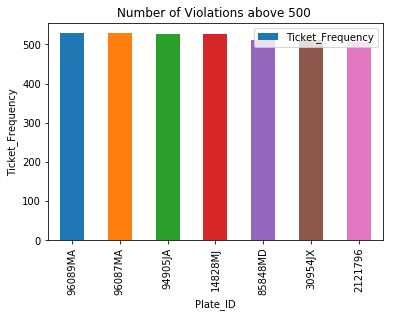

In [30]:
# Plot number of violation above 500
Violations_above_500_By_PlateID=Violations_above_500.toPandas()
plt.clf()
Violations_above_500_By_PlateID.plot(x= 'Plate_ID', y='Ticket_Frequency', kind='bar')
plt.title("Number of Violations above 500 ")
plt.xlabel('Plate_ID')
plt.ylabel('Ticket_Frequency')
plt.show()

###### There are 7 Plate IDs with more than 500 violations.

###  Examine the Data- Questions:
1.	Find the total number of tickets for the year.


In [32]:
Total_tickets_2017=spark.sql("Select count(*),count(distinct(Summons_Number)) from parking_bhs_2017")
Total_tickets_2017.show()
#Since count and distinct count of data is same, there is no duplicate tickets here.
#Answer: 5426657

+--------+------------------------------+
|count(1)|count(DISTINCT Summons_Number)|
+--------+------------------------------+
| 5426657|                       5426657|
+--------+------------------------------+



2.	Find out the number of unique states from where the cars that got parking tickets came. (Hint: Use the column 'Registration State'.)
There is a numeric entry '99' in the column, which should be corrected. Replace it with the state having the maximum entries. Provide the number of unique states again

In [33]:
Uniqe_states = spark.sql("SELECT distinct(Registration_State), Count(*) as Number_of_Records from parking_bhs_2017 group by Registration_State order by Number_of_Records desc")
Uniqe_states.count()

65

In [34]:
Uniqe_states.show(500)

+------------------+-----------------+
|Registration_State|Number_of_Records|
+------------------+-----------------+
|                NY|          4273951|
|                NJ|           475825|
|                PA|           140286|
|                CT|            70403|
|                FL|            69468|
|                IN|            45525|
|                MA|            38941|
|                VA|            34367|
|                MD|            30213|
|                NC|            27152|
|                TX|            18827|
|                IL|            18666|
|                GA|            17537|
|                AZ|            12379|
|                OH|            12281|
|                CA|            12153|
|                ME|            10806|
|                99|            10794|
|                SC|            10395|
|                MN|            10083|
|                OK|             9088|
|                TN|             8514|
|                DE|     

##### There are 65 distinct values of Registration_State.
- There is a numeric entry '99' in the column which should be corrected. We need to replace it with the state having maximum entries.
- Since the maximum number of tickets are issued in NY, We can replace 99 by NY.

In [35]:
from pyspark.sql.functions import when,lit
parking_bhs=parking_bhs.withColumn('Registration_State',when(parking_bhs["Registration_State"]=="99",lit('NY')).otherwise(parking_bhs["Registration_State"]))

In [36]:
parking_bhs.createOrReplaceTempView("parking_bhs_2017")

In [37]:
# Lets check again for number of distinct Registration_State.

Uniqe_states=spark.sql("SELECT Registration_State, Count(*) as Ticket_Frequency from parking_bhs_2017 group by Registration_State order by Ticket_Frequency desc")
Uniqe_states.count()

64

##### Answer to Question 2: There are 64 distinct values of Registration_State after replacing '99' with 'NY'

### Aggregation tasks

#### Q1. How often does each violation code occur? Display the frequency of the top five violation codes.

In [40]:
# Violation Code count
from pyspark.sql.functions import count,desc,countDistinct
parking_bhs.select(countDistinct("Violation_Code")).show()

+------------------------------+
|count(DISTINCT Violation_Code)|
+------------------------------+
|                           100|
+------------------------------+



In [41]:
# Frequency of each violation code occurs
Violation_Code_count = parking_bhs.select("Violation_Code")\
  .groupBy("Violation_Code")\
.agg(count("Violation_Code")\
.alias("no_of_tickets"))\
.sort(desc("no_of_tickets"))

Violation_Code_count.show(100)

+--------------+-------------+
|Violation_Code|no_of_tickets|
+--------------+-------------+
|            21|       767740|
|            36|       662765|
|            38|       541526|
|            14|       476405|
|            20|       319439|
|            46|       312168|
|            37|       293038|
|            40|       276905|
|            71|       263124|
|             7|       210176|
|            19|       148978|
|            70|       144242|
|            69|        96881|
|            31|        80528|
|            16|        74768|
|            47|        65427|
|            74|        57388|
|            50|        53710|
|             5|        48081|
|            48|        40970|
|            84|        40932|
|            24|        38435|
|            17|        38430|
|            51|        32553|
|            42|        32000|
|             9|        28670|
|            78|        26752|
|            10|        25917|
|            68|        25029|
|       

In [42]:
# Top 5 Violation code
top5_Violation_Code = spark.sql("SELECT Violation_Code, Count(*) as Ticket_Frequency from parking_bhs_2017 group by Violation_code order by Ticket_Frequency desc")
top5_Violation_Code.show(5)

+--------------+----------------+
|Violation_Code|Ticket_Frequency|
+--------------+----------------+
|            21|          767740|
|            36|          662765|
|            38|          541526|
|            14|          476405|
|            20|          319439|
+--------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

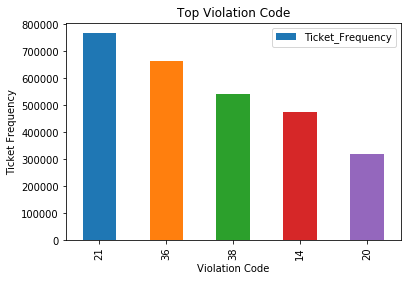

In [43]:
# Top 5 Violation code
top5_Violation_Code_for_plot = top5_Violation_Code.toPandas()
plt.clf()
top5_Violation_Code_for_plot.head(5).plot(x='Violation_Code', y='Ticket_Frequency', kind='bar')
plt.title("Top Violation Code")
plt.xlabel('Violation Code')
plt.ylabel('Ticket Frequency')
plt.show()

#### Q2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'? 
##### (Hint: Find the top 5 for both.)

In [44]:
# Each vehicle body type get a parking ticket
vehicleBodyType = spark.sql("SELECT Vehicle_Body_Type, count(*) as Ticket_Frequency from parking_bhs_2017 group by Vehicle_Body_Type order by Ticket_Frequency desc")
vehicleBodyType.show(5)

+-----------------+----------------+
|Vehicle_Body_Type|Ticket_Frequency|
+-----------------+----------------+
|             SUBN|         1882978|
|             4DSD|         1547063|
|              VAN|          723796|
|             DELV|          358924|
|              SDN|          192927|
+-----------------+----------------+
only showing top 5 rows



In [45]:
vehicleMake = spark.sql("SELECT Vehicle_Make, count(*) as Ticket_Frequency from parking_bhs_2017 group by Vehicle_Make order by Ticket_Frequency desc")
vehicleMake.show(5)

+------------+----------------+
|Vehicle_Make|Ticket_Frequency|
+------------+----------------+
|        FORD|          636527|
|       TOYOT|          605011|
|       HONDA|          538460|
|       NISSA|          461725|
|       CHEVR|          355868|
+------------+----------------+
only showing top 5 rows



#### Q3 :  A precinct is a police station that has a certain zone of the city under its command.Find the (5 highest) frequency of tickets for each of the following:


###### 1.'Violation Precinct' (this is the precinct of the zone where the violation occurred). Using this, can you make any insights for parking violations in any specific areas of the city?

In [46]:
Violation_Precinct = spark.sql("SELECT Violation_Precinct, count(*) as Ticket_Frequency from parking_bhs_2017 group by Violation_Precinct order by Ticket_Frequency desc")
Violation_Precinct.show(6)

+------------------+----------------+
|Violation_Precinct|Ticket_Frequency|
+------------------+----------------+
|                 0|          925395|
|                19|          274264|
|                14|          203375|
|                 1|          174620|
|                18|          169043|
|               114|          147223|
+------------------+----------------+
only showing top 6 rows



##### Here, The dataframe has the'Violating Precinct' as '0' for few entries. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

<Figure size 432x288 with 0 Axes>

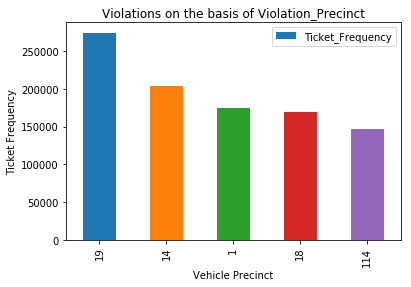

In [47]:
# plot Violations on the basis of Violation_Precinct
Violation_Precinct_for_plot = Violation_Precinct.toPandas()
plt.clf()
Violation_Precinct_for_plot[Violation_Precinct_for_plot.Violation_Precinct!=0].head(5).plot(x='Violation_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Violation_Precinct")
plt.xlabel('Vehicle Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

#### 2 'Issuer Precinct' (this is the precinct that issued the ticket)

In [48]:
Issue_precinct = spark.sql("SELECT Issuer_Precinct, count(*) as Ticket_Frequency from parking_bhs_2017 group by Issuer_Precinct order by Ticket_Frequency desc")  
Issue_precinct.show(5)

+---------------+----------------+
|Issuer_Precinct|Ticket_Frequency|
+---------------+----------------+
|              0|         1077884|
|             19|          266790|
|             14|          200328|
|              1|          168630|
|             18|          162908|
+---------------+----------------+
only showing top 5 rows



##### Here, The dataframe has the'Violating Precinct' as '0' for few entries.  These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

<Figure size 432x288 with 0 Axes>

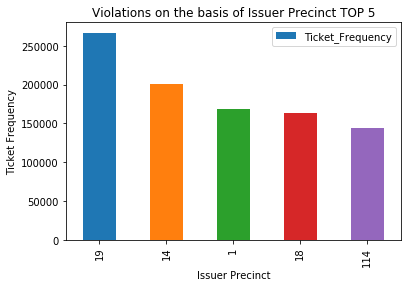

In [49]:
# plot Violations on the basis of Issue_Precinct
Issue_Precinct_for_plot = Issue_precinct.toPandas()
plt.clf()
Issue_Precinct_for_plot[Issue_Precinct_for_plot.Issuer_Precinct!=0].head(5).plot(x='Issuer_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Issuer Precinct TOP 5")
plt.xlabel('Issuer Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

* So the top 5 area where most violation occurs are 19, 14, 1, 18 and  114.
Similarily,  the top 5 Issuer Precient are 19, 14, 1, 18 and  114.

#### Q4. Find the violation code frequency across three precincts which have issued the most number of tickets.Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts?
Hint: In the SQL view, use the 'where' attribute to filter among three precincts.

##### 4.1 Finding violation code frequency

In [50]:
violation_code_frequency = spark.sql("select Issuer_Precinct,Violation_Code, count(*) as Frequency from parking_bhs_2017 group by Issuer_Precinct, Violation_Code order by Frequency desc" )
violation_code_frequency.show(7)

+---------------+--------------+---------+
|Issuer_Precinct|Violation_Code|Frequency|
+---------------+--------------+---------+
|              0|            36|   662765|
|              0|             7|   210175|
|              0|            21|   125923|
|             18|            14|    50135|
|             19|            46|    48422|
|              0|             5|    48076|
|             14|            14|    45019|
+---------------+--------------+---------+
only showing top 7 rows



##### Answer: Since '0' need not considered,  18,19,14 are the three issuer precincts with maximum number of violations.

In [51]:
# Issuer Precinct 18
violation_code_frequency_18 = spark.sql("select Violation_Code, count(*) as Frequency from parking_bhs_2017 where Issuer_Precinct=18 group by Violation_Code order by Frequency desc" )
violation_code_frequency_18.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    50135|
|            69|    20188|
|            47|    14105|
|            31|    11887|
|            46|     7861|
|            42|     6189|
|            38|     6157|
|            84|     5188|
|            19|     4580|
|            20|     4109|
+--------------+---------+
only showing top 10 rows



In [52]:
violation_code_frequency_19 = spark.sql("select Violation_Code, count(*) as Frequency from parking_bhs_2017 where Issuer_Precinct=19 group by Violation_Code order by Frequency desc" )
violation_code_frequency_19.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|    48422|
|            38|    36332|
|            37|    36046|
|            14|    29791|
|            21|    28409|
|            20|    14624|
|            40|    11408|
|            16|     9921|
|            71|     7489|
|            19|     6854|
+--------------+---------+
only showing top 10 rows



In [53]:
# Issuer Precinct 14
violation_code_frequency_14 = spark.sql("select Violation_Code, count(*) as Frequency from parking_bhs_2017 where Issuer_Precinct=14 group by Violation_Code order by Frequency desc" )
violation_code_frequency_14.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    45019|
|            69|    30453|
|            31|    22528|
|            47|    18357|
|            42|    10022|
|            46|     7675|
|            19|     7031|
|            84|     6739|
|            82|     5052|
|            40|     3581|
+--------------+---------+
only showing top 10 rows



In [54]:
#Are these codes common across precincts
common_violation_codes =spark.sql("select Violation_Code, count(*) as Frequency from parking_bhs_2017 where Issuer_Precinct in (18,19,14) group by Violation_Code order by Frequency desc")
common_violation_codes.show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|   124945|
|            46|    63958|
|            69|    53549|
|            38|    45721|
|            37|    39537|
+--------------+---------+
only showing top 5 rows



###### From the above data, we can conclude the following    
     1) Precinct 18 and Precinct 14 has more less similar top violation code.    
     2) Precinct 19 has very different top violation code.

#### Q5.Find out the properties of parking violations across different times of the day:

o	Find a way to deal with missing values, if any.   
##### (Hint: Check for the null values using 'isNull' under the SQL. Also, to remove the null values, check the 'dropna' command in the API documentation.)    
o	The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.   
o	Divide 24 hours into six equal discrete bins of time. Choose the intervals as you see fit. For each of these groups, find the three most commonly occurring violations.   
##### (Hint: Use the CASE-WHEN in SQL view to segregate into bins. To find the most commonly occurring violations, you can use an approach similar to the one mentioned in the hint for question 4.)    
o	Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).


In [55]:
# Number of missing values
Violation_Time_Missing_2017 = spark.sql("SELECT count(*) as No_of_Count_Values from parking_bhs_2017 WHERE Violation_Time is NULL")
Violation_Time_Missing_2017.show()

+------------------+
|No_of_Count_Values|
+------------------+
|                 0|
+------------------+



In [56]:
#Checking for the null value
from pyspark.sql.functions import col
parking_bhs.where(col("Violation_Time").isNull()).show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



In [57]:
parking_bhs.select('Violation_Time').show()

+--------------+
|Violation_Time|
+--------------+
|         0148P|
|         1044A|
|         0515P|
|         1007A|
|         0202A|
|         0743A|
|         0825A|
|         0938A|
|         1202P|
|         0159P|
|         0236A|
|         1258P|
|         1041A|
|         0748A|
|         0639A|
|         1005A|
|         0959A|
|         0244P|
|         0611A|
|         1044A|
+--------------+
only showing top 20 rows



In [60]:
# Divide 24 hours into six equal discrete bins of time
time_bins=spark.sql("SELECT Summons_Number, Violation_Code , Violation_Time, Issuer_Precinct, case when substring(Violation_Time,1,2) in ('00','01','02','03','12') and upper(substring(Violation_Time,-1))='A' then 1 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='A' then 2 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='A' then 3 when substring(Violation_Time,1,2) in ('12','00','01','02','03') and upper(substring(Violation_Time,-1))='P' then 4 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='P' then 5 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='P' then 6 else null end as Violation_Time_bin from parking_bhs_2017 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
time_bins.show()              

+--------------+--------------+--------------+---------------+------------------+
|Summons_Number|Violation_Code|Violation_Time|Issuer_Precinct|Violation_Time_bin|
+--------------+--------------+--------------+---------------+------------------+
|    8523552492|            38|         1055A|             52|                 3|
|    8539069866|            21|         1206P|             94|                 4|
|    8486072323|            14|         1029A|             14|                 3|
|    8566105485|            78|         0938P|            107|                 6|
|    8515117083|            21|         0915A|             30|                 3|
|    8506703712|            20|         0830A|              5|                 3|
|    8443544983|            14|         1234P|             66|                 4|
|    8566302783|            85|         0257A|            104|                 1|
|    8537963938|            21|         1005A|             94|                 3|
|    1419675813|

#### Bins Details

    Bin       Time Interval
    1         12:00 AM to 4:00 AM
    2         4:00 AM to 8:00 AM
    3         8:00 AM to 12:00 PM
    4         12:00 PM to 4:00 PM
    5         4:00 PM to 8:00 PM
    6         8:00 PM to 12:00 AM

In [61]:
time_bins.createOrReplaceTempView("bins_table")

In [62]:
# violation code time count
violation_code_time_count = spark.sql("SELECT Violation_Code,Violation_Time_bin, count(*) count from bins_table group by Violation_Code,Violation_Time_bin")
violation_code_time_count.show()

+--------------+------------------+------+
|Violation_Code|Violation_Time_bin| count|
+--------------+------------------+------+
|            71|                 4|103156|
|            92|                 2|     1|
|            41|                 3|   950|
|            10|                 2|  3164|
|            48|                 6|   620|
|            62|                 1|   278|
|            23|                 6|   691|
|            69|                 1|     1|
|            17|                 2|  4277|
|            16|                 3| 28163|
|            17|                 1|   995|
|            83|                 6|   251|
|            91|                 6|    33|
|            34|                 5|     1|
|            73|                 4|   738|
|            45|                 4|  1223|
|            79|                 1|    21|
|            58|                 1|     3|
|             6|                 1|    86|
|            80|                 3|   887|
+----------

In [63]:
bin1 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_table where Violation_Time_bin == 1 group by Violation_Code order by Vio_cnt desc")
bin1.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21|  36934|
|            40|  25810|
|            78|  15513|
+--------------+-------+
only showing top 3 rows



In [64]:
bin2 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_table where Violation_Time_bin == 2 group by Violation_Code order by Vio_cnt desc")
bin2.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            14|  74095|
|            40|  60609|
|            21|  57876|
+--------------+-------+
only showing top 3 rows



In [65]:
bin3 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_table where Violation_Time_bin == 3 group by Violation_Code order by Vio_cnt desc")
bin3.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21| 597827|
|            36| 348165|
|            38| 176310|
+--------------+-------+
only showing top 3 rows



In [67]:
bin4 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_table where Violation_Time_bin == 4 group by Violation_Code order by Vio_cnt desc")
bin4.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            36| 286284|
|            38| 240511|
|            37| 166969|
+--------------+-------+
only showing top 3 rows



In [68]:
bin5 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_table where Violation_Time_bin == 5 group by Violation_Code order by Vio_cnt desc")
bin5.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            38| 102784|
|            14|  75856|
|            37|  70317|
+--------------+-------+
only showing top 3 rows



In [70]:
bin6 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_table where Violation_Time_bin == 6 group by Violation_Code order by Vio_cnt desc")
bin6.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|             7|  26293|
|            40|  22301|
|            14|  21026|
+--------------+-------+
only showing top 3 rows



**Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).**

In [71]:
time_bin = spark.sql("select Violation_Time_bin, count(*) Violation_count from bins_table where Violation_Code in (21, 36, 38) group by Violation_Time_bin order by Violation_count desc")
time_bin.show(3)

+------------------+---------------+
|Violation_Time_bin|Violation_count|
+------------------+---------------+
|                 3|        1122302|
|                 4|         601432|
|                 5|         116574|
+------------------+---------------+
only showing top 3 rows



**Bins 3, 4, 5 are having most violations**   
The time is from 8:00 AM to 8:00 PM i.e., during Day time more vehicles were running and hence more violations.


#### Q6.Let’s try and find some seasonality in this data:

##### 1) First, divide the year into some number of seasons,and find frequencies of tickets for each season.

In [72]:
Seasons = spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 03 and 05 then 'spring' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 06 and 08 then 'summer' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 09 and 11 then 'autumn' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) in (1,2,12) then 'winter' else 'unknown' end  as season from parking_bhs_2017")
Seasons.show()

+--------------+---------------+------+
|Violation_Code|Issuer_Precinct|season|
+--------------+---------------+------+
|            36|              0|summer|
|            36|              0|summer|
|            48|             78|spring|
|            71|             72|spring|
|            14|            112|spring|
|            71|             67|summer|
|            42|              1|winter|
|            14|             63|winter|
|            36|              0|spring|
|            46|             71|summer|
|            71|             66|winter|
|            14|             84|summer|
|            40|             23|spring|
|            37|            977|spring|
|            20|            114|spring|
|            31|             13|summer|
|            21|             42|spring|
|             7|              0|spring|
|            37|             19|winter|
|            37|            106|spring|
+--------------+---------------+------+
only showing top 20 rows



    Season    Month intervall
    
    spring    March, April, May
    summer    June, July, August
    autumn    September, October, November
    winter    December, January, February

In [73]:
Seasons.createOrReplaceTempView("Seasons_table")

In [74]:
# Find out the violations in each Seasons
tickets_seasonality_freq = spark.sql("select season, count(*) as no_of_tickets from Seasons_table group by 1 order by 2 desc")
tickets_seasonality_freq.show()

+------+-------------+
|season|no_of_tickets|
+------+-------------+
|spring|      2870491|
|winter|      1702786|
|summer|       852405|
|autumn|          975|
+------+-------------+



In [75]:
# Violations in Spring season
violations_in_spring = spark.sql("select Violation_Code, count(*) as Frequency from Seasons_table where Issuer_Precinct in (19, 14, 1) and season = 'spring' group by Violation_Code order by Frequency desc" )
violations_in_spring.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    61633|
|            46|    37732|
|            38|    25511|
+--------------+---------+
only showing top 3 rows



In [76]:
# Violations in Winter season
violations_in_winter = spark.sql("select Violation_Code, count(*) as Frequency from Seasons_table where Issuer_Precinct in (19, 14, 1) and season = 'winter' group by Violation_Code order by Frequency desc" )
violations_in_winter.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    32824|
|            46|    20148|
|            38|    14885|
+--------------+---------+
only showing top 3 rows



In [78]:
# Violations in Summer season
violations_in_summer = spark.sql("select Violation_Code, count(*) as Frequency from Seasons_table where Issuer_Precinct in (19, 14, 1) and season = 'summer' group by Violation_Code order by Frequency desc" )
violations_in_summer.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    18689|
|            46|    10945|
|            20|    10393|
+--------------+---------+
only showing top 3 rows



In [79]:
# Violations in Autumn season
violations_in_autumn = spark.sql("select Violation_Code, count(*) as Frequency from Seasons_table where Issuer_Precinct in (19, 14, 1) and season = 'autumn' group by Violation_Code order by Frequency desc" )
violations_in_autumn.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|       15|
|            14|        9|
|             9|        3|
+--------------+---------+
only showing top 3 rows



#### Q7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

##### 1) Find total occurrences of the three most common violation codes

In [80]:
common_Violation_codes = spark.sql("select Violation_Code, count(*) as Frequency from parking_bhs_2017 group by Violation_Code order by Frequency desc")
common_Violation_codes.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|   767740|
|            36|   662765|
|            38|   541526|
+--------------+---------+
only showing top 3 rows



##### 2) Using this information, find the total amount collected for the three violation codes with maximum tickets. State the code which has the highest total collection.

In [81]:
from pyspark.sql.functions import when

common_Violation_fine=common_Violation_codes.withColumn("fine",when(common_Violation_codes.Violation_Code == 21, (common_Violation_codes.Frequency) *55).otherwise((common_Violation_codes.Frequency)*50))
common_Violation_fine.show(3)
print('Total collection = ',767740*55+662765*50+541526*50)

+--------------+---------+--------+
|Violation_Code|Frequency|    fine|
+--------------+---------+--------+
|            21|   767740|42225700|
|            36|   662765|33138250|
|            38|   541526|27076300|
+--------------+---------+--------+
only showing top 3 rows

Total collection =  102440250


##### 3) What can you intuitively infer from these findings?
- From the above analysis, it is found that January to June had the major violation & July  to December has a siginificant drop.
- Highest violations and collection was by "Code-21" (No parking where parking is not allowed by sign, street marking or traffic control device.)
- The Plate_ID with BLANKPLATE records were not considered.

##### Finally stop the spark session

In [82]:
spark.stop()